## Exploring the General Social Survey

Shuting Chen 

11/27/2017

### Exploration write-up

In [1]:
# Import useful packages and load data 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
gss = pd.read_csv('gss2012.csv')

### 1. Introduction 

In this paper I am going to elaborate several main results that I found in the data of the 2012 General Social Survey (GSS). By exploring the data of the 2012 GSS, I intend to uncover some patterns or differences in income distribution not only within distinct social groups in the U.S. but also between social groups in the U.S. Specifically, I consider following five aspects to classify people into several social groups: gender, age, race, educational levels, and degree of happiness. For each of these aspects, two underlying research questions would be discussed: 1) Is there any notable trend in income distribution within each social group that is specified by gender, age, race, educational levels or degree of happiness? 2) To what extent does it affect the income distribution across different social groups? The data of income levels are recorded by the variable "income06", which requires respondents to identify his/her last year's total family income before taxes as one of twenty-five income ranges provided by the survey.

### 2. Elaboration of main findings in the income distribution from five aspects

#### 2.0 Overall income distribution

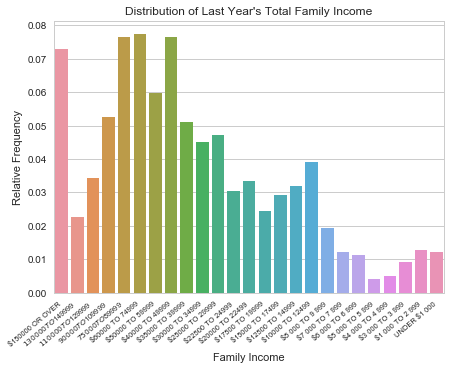

In [4]:
plt.figure(figsize=(7,5))
sns.set(style="whitegrid", color_codes=True)
s = ['$150000 OR OVER', '$130000 TO $149999', '$110000 TO $129999', '$90000 TO $109999', '$75000 TO $89999', 
     '$60000 TO 74999', '$50000 TO 59999', '$40000 TO 49999', '$35000 TO 39999', '$30000 TO 34999', '$25000 TO 29999', 
     '$22500 TO 24999', '$20000 TO 22499', '$17500 TO 19999', '$15000 TO 17499', '$12500 TO 14999', '$10000 TO 12499', 
     '$8 000 TO 9 999', '$7 000 TO 7 999', '$6 000 TO 6 999', '$5 000 TO 5 999', '$4 000 TO 4 999', '$3 000 TO 3 999', 
     '$1 000 TO 2 999', 'UNDER $1 000']
ax = sns.barplot(x="income06", y="income06", data=gss, estimator=lambda x: len(x) / len(gss), orient="v", 
                 order = s) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=7.5)
plt.xlabel(r'Family Income')
plt.ylabel(r'Relative Frequency')
plt.title("Distribution of Last Year's Total Family Income")
plt.show()

As shown in the bar chart above, the most common annual family income ranges are 75,000 to 89,999 dollars, 60,000 to 74,999 dollars and 40,000 to 49,999 dollars, each of which occupies about 7.5% of total respondents. The overall income distribution is a bit right-skewed with some extremely low family incomes and approximately 90% of respondents have annual family income greater than 10,000 dollars. 

#### 2.1 Income distribution by gender 

Given the bar chart below, only within two income intervals, which are 60,000 to 74,999 dollars and 150,000 dollars or over, is the proportion of males larger than that of females. Additionally, females have a much larger proportion within each income range at the middle of the distribution, starting from (35,000, 39,999) to (5,000, 9,999). It seems a bit unusual that females occupy more even in most of top income ranges. However, this is reasonable with the fact that there are approximately 200 more females than males in the sample. Besides, the income distribution of males is more concentrated in the left part, which means that male respondents have relatively higher family income on average than females. Nevertheless, it remains ambiguous whether the hypothesis that males have relatively higher average family income than females can be verified by the data. This is mainly attributed to the hardness of isolating the effect of gender on individual's family income and the lack of respondent's family information, which leaves potential improvement for future analysis.    

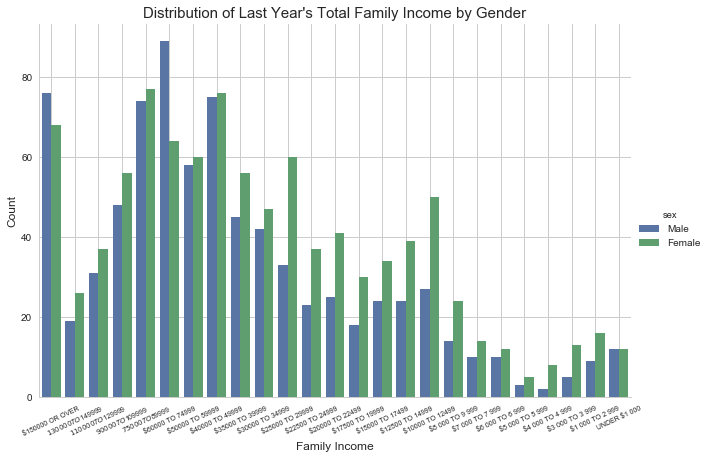

In [13]:
g1 = sns.factorplot('income06', kind='count', hue='sex', data=gss, size=6, aspect = 1.5, order = s)
g1.set_xticklabels(rotation=25, fontsize=7)
plt.grid(True)
plt.xlabel(r'Family Income', fontsize=12)
plt.ylabel(r'Count', fontsize=12)
plt.title("Distribution of Last Year's Total Family Income by Gender", fontsize = 15)
plt.show()

#### 2.2 Income distribution by age

The following boxplot visualizes the age distribution within each income interval. The median age of top one-third income intervals almost falls in 40 to 50 while the median age of bottom five income ranges almost falls in 20 to 40. This is reasonable because people at their 40's or 50's are expected to gain wealth most efficiently. Compared to younger people, they have rich experience and social network that play an important role in wealth accumulation. Meanwhile, they are more energetic and creative than the older. The dispersion of age distribution within each income group is quite similar in the middle of the plot while the age distribution of income groups at both ends is less spread out with smaller range.   

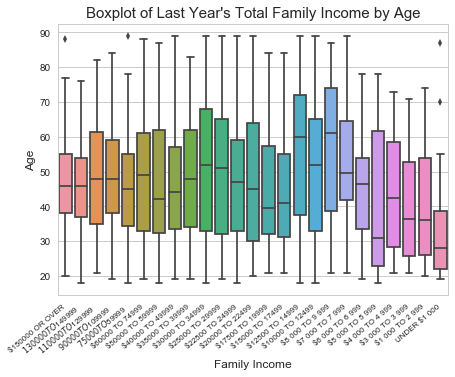

In [22]:
plt.figure(figsize=(7,5))
bp3 = sns.boxplot(x="income06", y="age", data=gss, order = s)
bp3.set_xticklabels(bp3.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.xlabel(r'Family Income', fontsize=12)
plt.ylabel(r'Age', fontsize=12)
plt.title("Boxplot of Last Year's Total Family Income by Age", fontsize = 15)
plt.show()

Other than generating income distribution by age within income groups, it is possible to explore further by constructing income distribution across age and gender. It possibly provides the channel to examine the hypotheses that the age distribution within each income group is different if the data is grouped by gender or the overall pattern of age distribution across all income groups is distinct between males and females. Observing the following pair of boxplots, the pattern of age distribution is quite similar between gender in the top half income groups, though the median age of females centers around 50 across different income groups while that of males ranges from 30's to 50's. For each of bottom half income groups, the age distribution looks distinct between gender and it is also hard to find a uniformed trend within gender. Presumably, it somewhat reflects relatively high uncertainty within each bottom half income groups and we need to explore further about group composition to figure out why there exists notable difference of age distribution between gender for the same income range. One may suspect the randomness of respondents and concern about the selection bias in the data.   

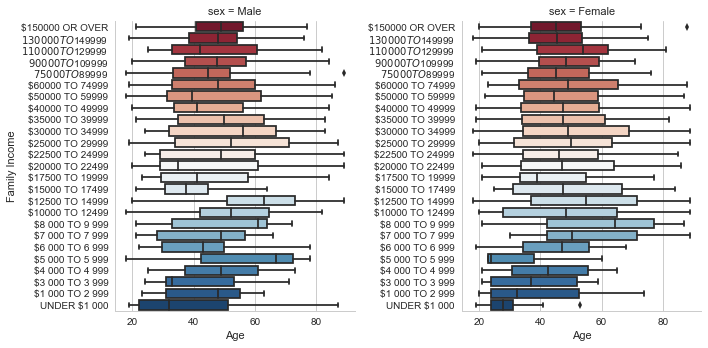

In [38]:
ag = sns.factorplot(x="age", y="income06", col="sex", data=gss, kind="box", palette="RdBu", 
                    size=5, aspect=1, order = s)
(ag.set_axis_labels("Age", "Family Income"))

#### 2.3 Income distribution by educational levels 

What is the distribution of educational levels within each income group? Do people with higher education level tend to earn more than those with lower education level? The following bar chart provides some potential answers to these two questions. Firstly, the majority of respondents hold bachelor or graduate degree in the top three income groups. Looking down the distribution, the proportion of respondents holding high school certificate increases dramatically and the completion of high school dominates other four educational levels in all middle income groups. This demonstrates that higher education allows people to have more probability of gaining top wealth while the completion of high school could reasonably help people to secure an acceptable income level. Besides, the income distribution of respondents having education less than high school centers around the middle and bottom half of the income ranges (left-skewed), which has apparent difference from the income distribution of other four education levels. Therefore, it generally supports the hypothesis that people with higher education level tend to earn more. 

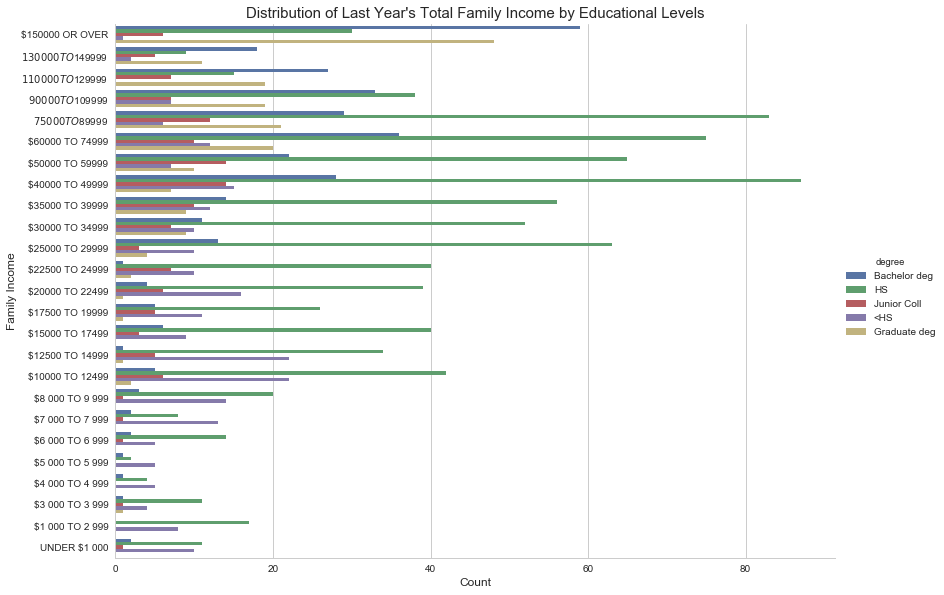

In [36]:
edu = sns.factorplot(y='income06', kind='count', hue='degree', data=gss, size=8, aspect = 1.5, order = s)
plt.xlabel(r'Count', fontsize=12)
plt.ylabel(r'Family Income', fontsize=12)
plt.title("Distribution of Last Year's Total Family Income by Educational Levels", fontsize = 15)
plt.show()

#### 2.4 Income distribution by race 

It is displayed in the bar chart below that no matter in which income group, the white are the majority over the black and people belonging to other races. This is because 74.82% of respondents identified themselves as white. Hence, it would be better to compare differences of income distribution between races rather than focus on the composition difference within each income group. By comparing the income distributions of three races, it is straightforward to recognize that the income distribution of the white concentrates more in the first half income groups than that of other two races. Potentially, this could be explained by the higher average education level or higher social position and connection among the white. However, to address the question about whether the difference of income distribution between races is statistically significant, we need to conduct extra statistical inference. 

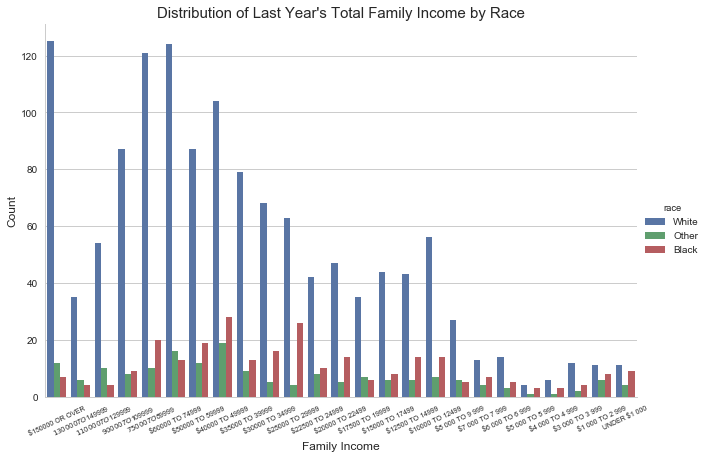

In [39]:
rac = sns.factorplot(x='income06', kind='count', hue='race', data=gss, size=6, aspect = 1.5, order = s)
rac.set_xticklabels(rotation=25, fontsize=7)
plt.xlabel(r'Family Income', fontsize=12)
plt.ylabel(r'Count', fontsize=12)
plt.title("Distribution of Last Year's Total Family Income by Race", fontsize = 15)
plt.show()

#### 2.5 Income distribution by degree of happiness 

Other than decomposing the income distribution by demographic characteristics, we might be curious about whether individual's mood would have impact on earnings. The variable "happy" records respondents' feeling in recent days. Based on the assumption that the respondent's feeling at the time of interview approximately remains the same level as his/her overall feeling during last year, it is possible to compare the income distributions among three groups of people with different feeling of happiness. As shown in the bar plot below, people perceiving highest degree of happiness have higher average income than others feeling less happiness. Both income distributions of people feeling pretty happy or very happy center around the first half income ranges while that of people feeling not too happy gathers around the middle income intervals. Consequently, it seems to support the hypothesis that positive feeling would be good for obtaining higher earnings. However, someone may also argue that positive feeling is actually the result of existing higher income. Hence, it is possible to ask respondents extra questions about the reasons of their feelings. 

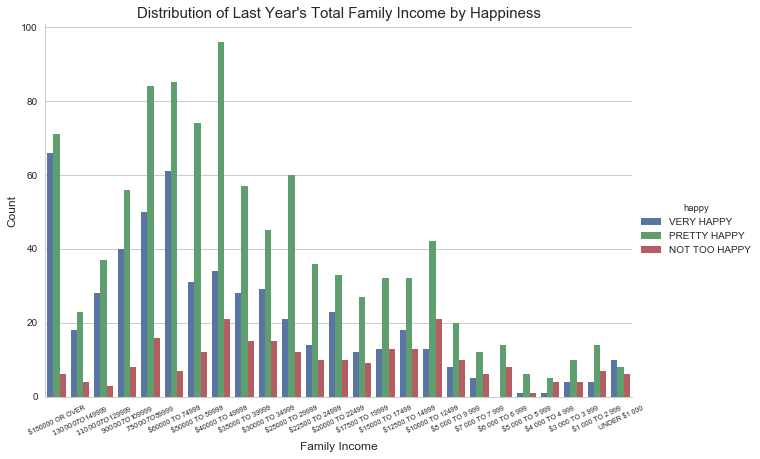

In [40]:
hap = sns.factorplot(x='income06', kind='count', hue='happy', data=gss, size=6, aspect = 1.5, order = s)
hap.set_xticklabels(rotation=25, fontsize=7)
plt.xlabel(r'Family Income', fontsize=12)
plt.ylabel(r'Count', fontsize=12)
plt.title("Distribution of Last Year's Total Family Income by Happiness", fontsize = 15)
plt.show()